In [32]:
from scipy.special import gamma as GAMMA, factorial, beta as BETA
import numpy as np
import math
import matplotlib.pyplot as plt

In [33]:
def f(t):
    return 5

In [34]:
def binkoef(a, j):
    return 1 / (a + 1) / BETA(j + 1, a - j +1)

In [4]:
def div_al_a_t_f(al, a, t, fun, h = 0.1):
    result = 0
    N = math.ceil((t - a) / h)

    for j in range(N):
        result += ((-1)**j) * binkoef(al, j) * fun(t - j * h)
    
    return result / (h**al)

In [5]:
div_al_a_t_f(0.5, 2, 5, f, 0.03)

1.634814548965838

In [6]:
x = np.arange(0, 10, 0.02)
y = [div_al_a_t_f(0.5, 0, i, f, 0.09) for i in x]

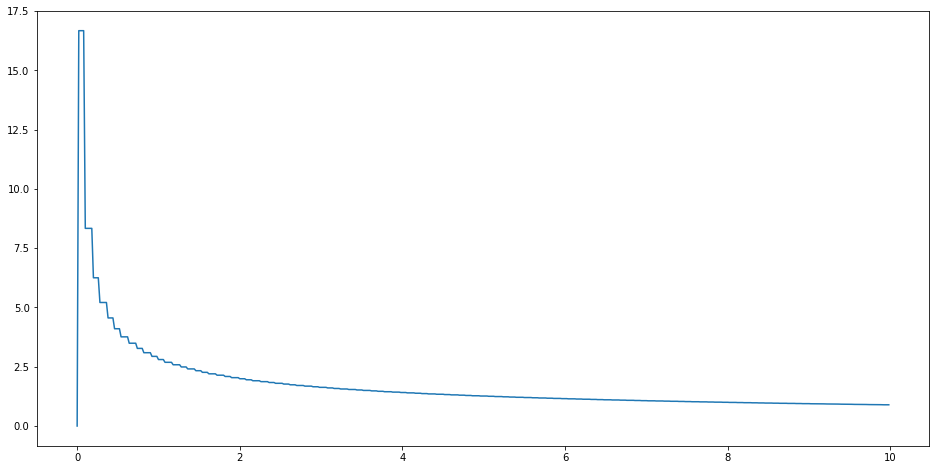

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
plt.plot(x, y)
# plt.plot(x, np.sqrt(4*x/np.pi))
plt.show()

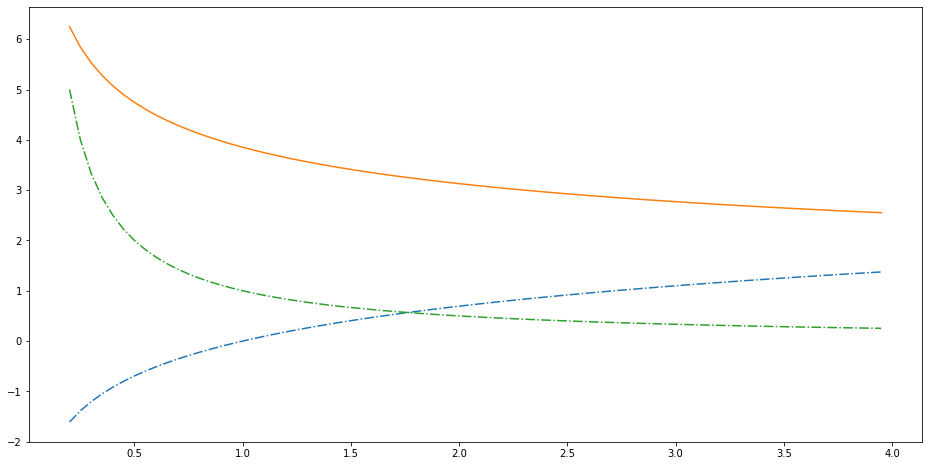

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# x = np.arange(0.3, 4, 0.05)
# for al in np.arange(0.2, 2, 0.8):
#     y = [div_al_a_t_f(al, 0.05, i, f, 0.001) for i in x]
    
#     plt.plot(x, y)



alpha = 0.3
x = np.arange(0.2, 4, 0.05)
y = [div_al_a_t_f(alpha, 0.0001, i, f, 0.001) for i in x]

plt.plot(x, np.log(x), '-.') 
plt.plot(x, y)
plt.plot(x, 1 / x, '-.')

# plt.plot(x, np.log(x), '-.') 
# # plt.plot(x, f(x + np.pi / 2 * alpha), '-.') 

# plt.plot(x, 1 / x, '-.')

plt.show()

## Численное решение дробно-дифференциальных уравнений

$$ \frac{d^\gamma u}{dt^\gamma} = (1+\beta)\frac{D(x,t)}{2}\frac{d_+^\alpha u}{dx^\alpha} 
+ (1-\beta)\frac{D(x,t)}{2}\frac{d_-^\alpha u}{dx^\alpha} + f(x, t)$$

Дробный дифференциал по Грюнвальду - Летникову:

$$ \frac{d_+^\alpha f}{dt^\alpha} = \lim_{h \rightarrow 0} \frac{1}{h^\alpha} \sum_{j=0}^{\infty} (-1)^j 
\begin{pmatrix} \alpha \\ j \end{pmatrix} f(t - jh)  $$

$$ \frac{d_-^\alpha f}{dt^\alpha} = \lim_{h \rightarrow 0} \frac{1}{h^\alpha} \sum_{j=0}^{\infty} (-1)^j 
\begin{pmatrix} \alpha \\ j \end{pmatrix} f(t + jh)  $$

### 1. Часть

Численное представление дробно дифференциального уравнения:

$$ \frac{1}{\tau^\gamma} \sum_{j=0}^{\infty}{g_{\gamma,j} u_{i}^{k-j}} = 
\left[
(1+\beta) \frac{D_i^k}{2} \frac{1}{h^\alpha} \sum_{j=0}^{\infty}{g_{\alpha,j} u_{i-j}^{k}}
\right]
+
\left[
(1-\beta) \frac{D_i^k}{2} \frac{1}{h^\alpha} \sum_{j=0}^{\infty}{g_{\alpha,j} u_{i+j}^{k}}
\right] + f_i^k $$

$$ \frac{1}{\tau^\gamma} \sum_{j=0}^{k}{g_{\gamma,j} u_{i}^{k-j}} = 
\left[
(1+\beta) \frac{D_i^k}{2} \frac{1}{h^\alpha} \sum_{j=0}^{i}{g_{\alpha,j} u_{i-j}^{k}}
\right]
+
\left[
(1-\beta) \frac{D_i^k}{2} \frac{1}{h^\alpha} \sum_{j=0}^{n-i}{g_{\alpha,j} u_{i+j}^{k}}
\right] + f_i^k$$

$$ \sum_{j=0}^{k}{g_{\gamma,j} u_{i}^{k-j}} = 
\left[
(1+\beta) \frac{D_i^k}{2} \frac{\tau^\gamma}{h^\alpha} \sum_{j=0}^{i}{g_{\alpha,j} u_{i-j}^{k}}
\right]
+
\left[
(1-\beta) \frac{D_i^k}{2} \frac{\tau^\gamma}{h^\alpha} \sum_{j=0}^{n-i}{g_{\alpha,j} u_{i+j}^{k}}
\right] + \tau^\gamma f_i^k$$

Пусть:

$ a_i^k = (1+\beta)\frac{D_i^k}{2}\frac{\tau^\gamma}{h^\alpha} $

$ b_i^k = (1-\beta)\frac{D_i^k}{2}\frac{\tau^\gamma}{h^\alpha} $

$ d_i^k = \sum_{j=1}^{k}{g_{\gamma,j} u_{i}^{k-j}} - \tau^\gamma f_i^k $

Тогда:

$$ \sum_{j=0}^{k}{g_{\gamma,j} u_{i}^{k-j}} = 
\left[
a_i^k \sum_{j=0}^{i}{g_{\alpha,j} u_{i-j}^{k}}
\right]
+
\left[
b_i^k \sum_{j=0}^{n-i}{g_{\alpha,j} u_{i+j}^{k}}
\right] + \tau^\gamma f_i^k$$

$$ g_{\gamma, 0}u_{i}^{k} + d_i^k = 
\left[ a_i^kg_{\alpha, 0}u_{i}^{k} + a_i^kg_{\alpha, 1}u_{i-1}^{k} + ... + a_i^kg_{\alpha, i}u_{0}^{k} \right] +
\left[ b_i^kg_{\alpha, 0}u_{i}^{k} + b_i^kg_{\alpha, 1}u_{i+1}^{k} + ... + b_i^kg_{\alpha, n-i}u_{n}^{k} \right] \
$$

$$ a_i^kg_{\alpha, i}u_{0}^{k} + a_i^kg_{\alpha, i-1}u_{1}^{k} + ... + a_i^kg_{\alpha, 1}u_{i-1}^{k} +
\left( a_i^kg_{\alpha, 0} + b_i^kg_{\alpha, 0} - g_{\gamma, 0} \right) u_{i}^{k} +
b_i^kg_{\alpha, 1}u_{i+1}^{k} + ... + b_i^kg_{\alpha, n-i}u_{n}^{k}
= d_i^k \
$$

$$ \begin{pmatrix}
\left( a_0^kg_{\alpha, 0} + b_0^kg_{\alpha, 0} - g_{\gamma, 0} \right) & b_0^kg_{\alpha, 1} & b_0^kg_{\alpha, 2} & \dots  & b_0^kg_{\alpha, n} 
\\
a_1^kg_{\alpha, 1} & \left( a_1^kg_{\alpha, 0} + b_1^kg_{\alpha, 0} - g_{\gamma, 0} \right) & b_1^kg_{\alpha, 1} & \dots  & b_1^kg_{\alpha, n-1} \\
a_2^kg_{\alpha, 2} & a_2^kg_{\alpha, 1} & \left( a_2^kg_{\alpha, 0} + b_2^kg_{\alpha, 0} - g_{\gamma, 0} \right) & \dots  & b_2^kg_{\alpha, n-2} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    a_{n-1}^kg_{\alpha, n-1} & a_{n-1}^kg_{\alpha, n-2} & a_{n-1}^kg_{\alpha, n-3} & \dots  & b_{n-1}^kg_{\alpha, 1} \\
    a_n^kg_{\alpha, n} & a_n^kg_{\alpha, n-1} & a_n^kg_{\alpha, n-2} & \dots  & \left( a_n^kg_{\alpha, 0} + b_n^kg_{\alpha, 0} - g_{\gamma, 0} \right)
\end{pmatrix} \begin{pmatrix} u_0^k \\ u_1^k \\ \vdots \\ u_i^k \\ \vdots \\ u_n^k \end{pmatrix} =
\begin{pmatrix} d_0^k \\ d_1^k \\ \vdots \\ d_i^k \\ \vdots \\ d_n^k \end{pmatrix}$$

In [9]:
# FractionalDifferentialEquationSolver
import numpy as np
import scipy.linalg
from scipy.special import gamma as GAMMA, factorial, beta as BETA
import numpy as np
import math
import matplotlib.pyplot as plt

class FDES():
    
    def __init__(self, L, R, T, alpha, beta, gamma, D, h, tau, psi, f):
        self.n = int ((R - L) / h)
        self.k = int (T / tau)
        print(self.n, self.k)
        self.alpha = alpha
        self.gamma = gamma
        self.tau = tau
        self.h = h
        self.L = L
        self.D = D
        self.f = f
        self.result = np.array([[0.0 for i in range(self.n + 1)] for t in range(self.k + 1)])
        
        for i in range(self.n + 1):
            self.result[0][i] = psi(self.x_i(i))
            
        self.A = np.array([[0.0 for i in range(self.n + 1)] for t in range(self.n + 1)], dtype=np.float64)
        
        self.a = lambda x, t: (1.0 + beta) * (self.D(x, t) / 2.0) * ((tau**gamma)/(h**alpha))
        self.b = lambda x, t: (1.0 - beta) * (self.D(x, t) / 2.0) * ((tau**gamma)/(h**alpha))
        
    def g(self, a, j):
        return (-1)**j / (a + 1) / BETA(j + 1, a - j +1)
        
    def x_i(self, i):
        return self.L + i * self.h
    
    def t_k(self, k):
        return k * self.tau
        
    def solve(self):
        
        for t in range(1, self.k + 1):
            
            d = np.array([0.0 for i in range(self.n + 1)])
        
            for i in range(self.n + 1):
                for j in range(1, t + 1):
                    d[i] += self.g(self.gamma, j) * self.result[t-j][i]

                d[i] = d[i] - (self.tau**self.gamma) * self.f(self.x_i(i), self.t_k(t))
            
            # Заполняем матрицу А
            for i in range(self.n + 1):
                for j in range(self.n + 1):
                    if i == j:
                        self.A[i][j] = self.a(self.x_i(i), self.t_k(t)) + self.b(self.x_i(i), self.t_k(t)) - 1.0
                    elif i < j:
                        self.A[i][j] = self.b(self.x_i(i), self.t_k(t)) * self.g(self.alpha, j - i)
                    else:
                        self.A[i][j] = self.a(self.x_i(i), self.t_k(t)) * self.g(self.alpha, i - j)
  
            # Решаем систему
            self.result[t] = scipy.linalg.solve(self.A, d)

        return self
    
    def draw(self, rows, decision, sharex='all', sharey='row'):
        res = self.result
        colums = 3
        all_count = colums * rows
        step = self.k // (all_count - 1)

        fig, ax = plt.subplots(rows, colums, figsize=(16, 4*rows), sharex=sharex, sharey=sharey)
        X = np.array([self.L + self.h*i for i in range(self.n+1)])

        for kk in range(0, all_count):

            TIME = np.array([self.tau*kk*step for i in range(self.n+1)])
            
            if not decision == None:
                ax[kk // colums, kk % colums].plot(X, decision(X, TIME))
            ax[kk // colums, kk % colums].plot(X, res[kk*step], '.-')
            ax[kk // colums, kk % colums].set_title(f"{kk*step} (t = {self.tau*kk*step})")

        plt.show()

2.6857958838184377 0.5294117647058824
20 2000


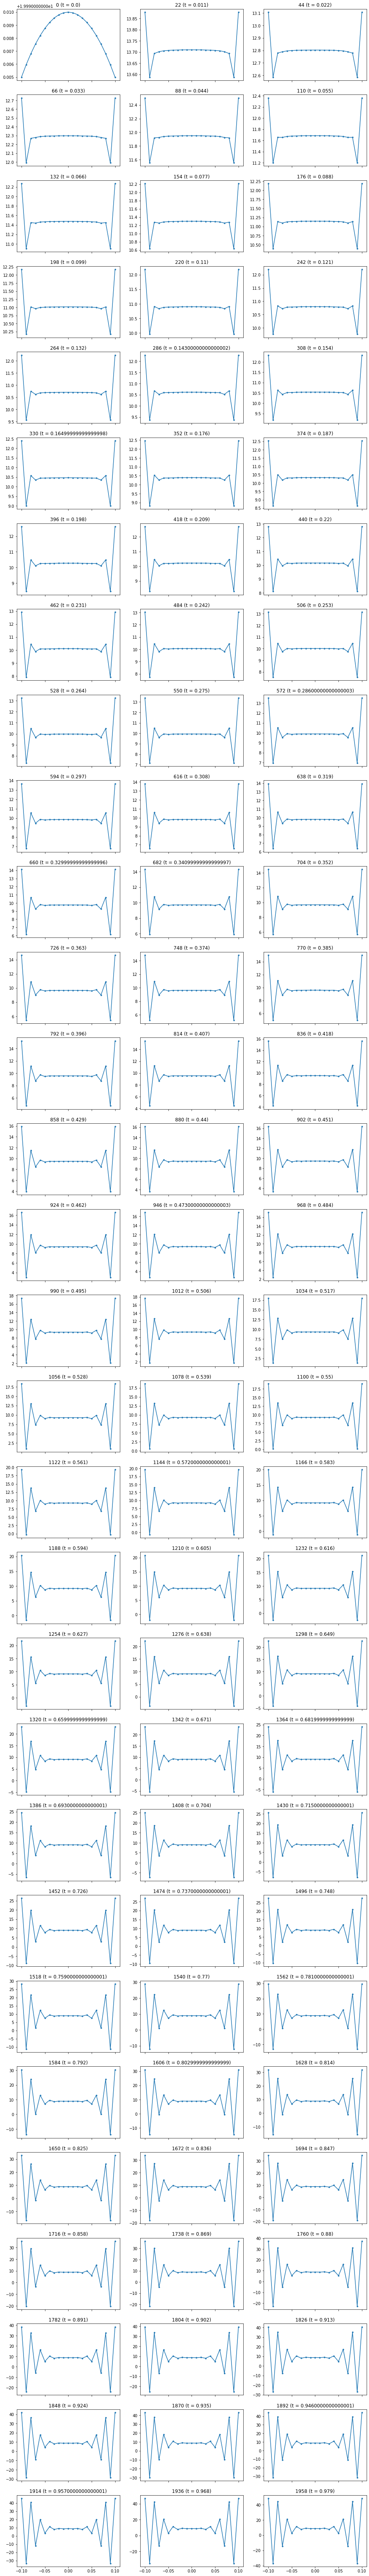

In [26]:
L, R = -0.1, 0.1
T = 1.0
alpha = 1.7
gamma = 0.9

def D(x, t):
    return 0.0005

h = 0.01
tau = 0.0005
beta = 0.0

print((tau**gamma)/(h**alpha), gamma/alpha)

def psi(x):
    return 20.0*np.exp(-x**2/2/20.0)

def f(x, t):
    return 0

def decision(x, t):
    return np.exp(x) * np.exp(t)

a = FDES(L, R, T, alpha, beta, gamma, D, h, tau, psi, f).solve()
a.draw(30, decision=None, sharex='all', sharey='none')

329.09555108355926 0.5294117647058824
100 400


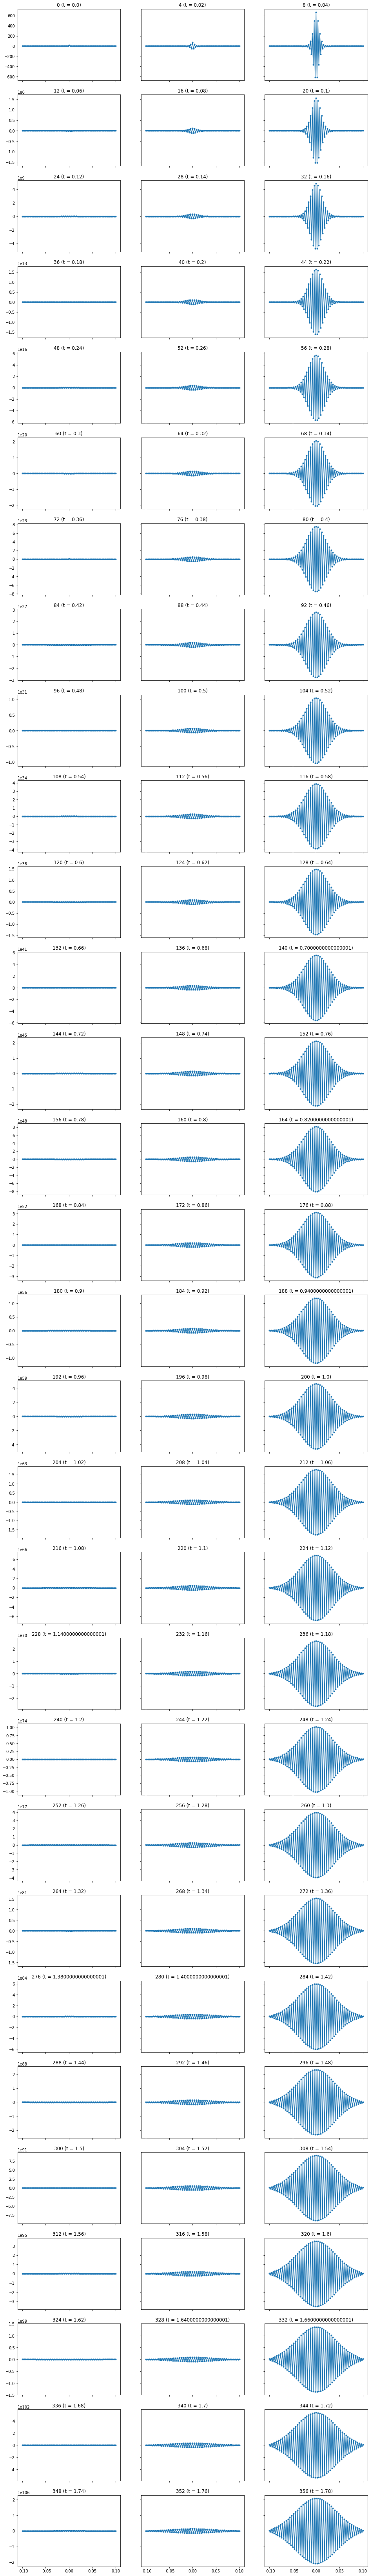

In [12]:
L, R = -0.1, 0.1
T = 2.0
alpha = 1.7
gamma = 0.9

def D(x, t):
    return 0.0005

h = 0.002
tau = 0.005
beta = 0.0

print((tau**gamma)/(h**alpha), gamma/alpha)

def psi(x):
    return 20.0 * 1.0 if np.abs(x) < h else 0.0

def f(x, t):
    return 0.0

def decision(x, t):
    return np.exp(x) * np.exp(t)

a = FDES(L, R, T, alpha, beta, gamma, D, h, tau, psi, f).solve()
a.draw(30, decision=None, sharex='all', sharey='row')

### 2. Часть

Модифицированный метод Грюнвальда - Летникова:

$$ \frac{1}{\tau^\gamma} \sum_{j=0}^{\infty}{g_{\gamma,j} u_{i}^{k-(j-s_2)}} = 
\left[
(1+\beta) \frac{D_i^k}{2} \frac{1}{h^\alpha} \sum_{j=0}^{\infty}{g_{\alpha,j} u_{i-(j-s_1)}^{k}}
\right]
+
\left[
(1-\beta) \frac{D_i^k}{2} \frac{1}{h^\alpha} \sum_{j=0}^{\infty}{g_{\alpha,j} u_{i+(j-s_1)}^{k}}
\right] + f_i^k$$

Пусть:

$ s_1 = 1 $

$ s_2 = 0 $

Тогда:

$$ \frac{1}{\tau^\gamma} \sum_{j=0}^{\infty}{g_{\gamma,j} u_{i}^{k-j}} = 
\left[
(1+\beta) \frac{D_i^k}{2} \frac{1}{h^\alpha} \sum_{j=0}^{\infty}{g_{\alpha,j} u_{i-j+1}^{k}}
\right]
+
\left[
(1-\beta) \frac{D_i^k}{2} \frac{1}{h^\alpha} \sum_{j=0}^{\infty}{g_{\alpha,j} u_{i+j-1}^{k}}
\right] + f_i^k$$

$$ \frac{1}{\tau^\gamma} \sum_{j=0}^{k}{g_{\gamma,j} u_{i}^{k-j}} = 
\left[
(1+\beta) \frac{D_i^k}{2} \frac{1}{h^\alpha} \sum_{j=0}^{i+1}{g_{\alpha,j} u_{i-j+1}^{k}}
\right]
+
\left[
(1-\beta) \frac{D_i^k}{2} \frac{1}{h^\alpha} \sum_{j=0}^{n-i+1}{g_{\alpha,j} u_{i+j-1}^{k}}
\right] + f_i^k$$

$$ \sum_{j=0}^{k}{g_{\gamma,j} u_{i}^{k-j}} = 
\left[
(1+\beta) \frac{D_i^k}{2} \frac{\tau^\gamma}{h^\alpha} \sum_{j=0}^{i+1}{g_{\alpha,j} u_{i-j+1}^{k}}
\right]
+
\left[
(1-\beta) \frac{D_i^k}{2} \frac{\tau^\gamma}{h^\alpha} \sum_{j=0}^{n-i+1}{g_{\alpha,j} u_{i+j-1}^{k}}
\right] + \tau^\gamma f_i^k$$

Пусть:

$ a_i^k = (1+\beta)\frac{D_i^k}{2}\frac{\tau^\gamma}{h^\alpha} $

$ b_i^k = (1-\beta)\frac{D_i^k}{2}\frac{\tau^\gamma}{h^\alpha} $

$ d_i^k = \sum_{j=1}^{k}{g_{\gamma,j} u_{i}^{k-j}} - \tau^\gamma f_i^k $

Тогда:

$$ \sum_{j=0}^{k}{g_{\gamma,j} u_{i}^{k-j}} = 
\left[
a_i^k \sum_{j=0}^{i+1}{g_{\alpha,j} u_{i-j+1}^{k}}
\right]
+
\left[
b_i^k \sum_{j=0}^{n-i+1}{g_{\alpha,j} u_{i+j-1}^{k}}
\right] + \tau^\gamma f_i^k$$

$$ g_{\gamma, 0}u_{i}^{k} + d_i^k = 
\left[ a_i^kg_{\alpha, 0}u_{i+1}^{k} + a_i^kg_{\alpha, 1}u_{i}^{k} + a_i^kg_{\alpha, 2}u_{i-1}^{k} + ... + a_i^kg_{\alpha, i+1}u_{0}^{k} \right] +
\left[ b_i^kg_{\alpha, 0}u_{i-1}^{k} + b_i^kg_{\alpha, 1}u_{i}^{k} + b_i^kg_{\alpha, 2}u_{i+1}^{k} + ... + b_i^kg_{\alpha, n-i+1}u_{n}^{k} \right] \
$$

$$ a_i^kg_{\alpha, i+1}u_{0}^{k} + a_i^kg_{\alpha, i}u_{1}^{k} + ... + 
\left( a_i^kg_{\alpha, 2} + b_i^kg_{\alpha, 0} \right) u_{i-1}^{k} +
\left( a_i^kg_{\alpha, 1} + b_i^kg_{\alpha, 1} - g_{\gamma, 0} \right) u_{i}^{k} +
\left( a_i^kg_{\alpha, 0} + b_i^kg_{\alpha, 2} \right) u_{i+1}^{k} + 
... + b_i^kg_{\alpha, n-i+1}u_{n}^{k}
= d_i^k \
$$

$$ \begin{pmatrix}
\left( a_0^kg_{\alpha, 1} + b_0^kg_{\alpha, 1} - g_{\gamma, 0} \right) & \left( a_0^kg_{\alpha, 0} + b_0^kg_{\alpha, 2} \right) & b_0^kg_{\alpha, 3} & \dots  & b_0^kg_{\alpha, n + 1} 
\\
\left( a_1^kg_{\alpha, 2} + b_1^kg_{\alpha, 0} \right) & \left( a_1^kg_{\alpha, 1} + b_1^kg_{\alpha, 1} - g_{\gamma, 0} \right) & \left( a_1^kg_{\alpha, 0} + b_1^kg_{\alpha, 2} \right) & \dots  & b_1^kg_{\alpha, n} 
\\
a_2^kg_{\alpha, 3} & \left( a_2^kg_{\alpha, 2} + b_2^kg_{\alpha, 0} \right) & \left( a_2^kg_{\alpha, 1} + b_2^kg_{\alpha, 1} - g_{\gamma, 0} \right) & \dots  & b_2^kg_{\alpha, n-1} 
\\
    \vdots & \vdots & \vdots & \ddots & \vdots 
\\
a_{n-1}^kg_{\alpha, n} & a_{n-1}^kg_{\alpha, n-1} & a_{n-1}^kg_{\alpha, n-2} & \dots  & \left( a_{n-1}^kg_{\alpha, 0} + b_{n-1}^kg_{\alpha, 2} \right) 
\\
a_n^kg_{\alpha, n+1} & a_n^kg_{\alpha, n} & a_n^kg_{\alpha, n-1} & \dots  & \left( a_n^kg_{\alpha, 1} + b_n^kg_{\alpha, 1} - g_{\gamma, 0} \right)
\end{pmatrix} \begin{pmatrix} u_0^k \\ u_1^k \\ \vdots \\ u_i^k \\ \vdots \\ u_n^k \end{pmatrix} =
\begin{pmatrix} d_0^k \\ d_1^k \\ \vdots \\ d_i^k \\ \vdots \\ d_n^k \end{pmatrix}$$

$$ \begin{pmatrix}
\left( a_0^kg_{\alpha, 1} + b_0^kg_{\alpha, 1} - 1 \right) & \left( a_0^k + b_0^kg_{\alpha, 2} \right) & b_0^kg_{\alpha, 3} & \dots  & b_0^kg_{\alpha, n + 1} 
\\
\left( a_1^kg_{\alpha, 2} + b_1^k \right) & \left( a_1^kg_{\alpha, 1} + b_1^kg_{\alpha, 1} - 1 \right) & \left( a_1^k + b_1^kg_{\alpha, 2} \right) & \dots  & b_1^kg_{\alpha, n} 
\\
a_2^kg_{\alpha, 3} & \left( a_2^kg_{\alpha, 2} + b_2^k \right) & \left( a_2^kg_{\alpha, 1} + b_2^kg_{\alpha, 1} - 1 \right) & \dots  & b_2^kg_{\alpha, n-1} 
\\
    \vdots & \vdots & \vdots & \ddots & \vdots 
\\
a_{n-1}^kg_{\alpha, n} & a_{n-1}^kg_{\alpha, n-1} & a_{n-1}^kg_{\alpha, n-2} & \dots  & \left( a_{n-1}^k + b_{n-1}^kg_{\alpha, 2} \right) 
\\
a_n^kg_{\alpha, n+1} & a_n^kg_{\alpha, n} & a_n^kg_{\alpha, n-1} & \dots  & \left( a_n^kg_{\alpha, 1} + b_n^kg_{\alpha, 1} - 1 \right)
\end{pmatrix} \begin{pmatrix} u_0^k \\ u_1^k \\ \vdots \\ u_i^k \\ \vdots \\ u_n^k \end{pmatrix} =
\begin{pmatrix} d_0^k \\ d_1^k \\ \vdots \\ d_i^k \\ \vdots \\ d_n^k \end{pmatrix}$$

In [13]:
# ModifiedFractionalDifferentialEquationSolver
import numpy as np
import scipy.linalg
from scipy.special import gamma as GAMMA, factorial, beta as BETA
import numpy as np
import math
import matplotlib.pyplot as plt

class MFDES():
    
    def __init__(self, L, R, T, alpha, beta, gamma, D, h, tau, psi, f, phiL=None, phiR=None):
        self.n = int ((R - L) / h)
        self.k = int (T / tau)
        print(self.n, self.k)
        self.alpha = alpha
        self.gamma = gamma
        self.tau = tau
        self.h = h
        self.L = L
        self.D = D
        self.f = f
        self.phiL = phiL
        self.phiR = phiR
        self.result = np.array([[0.0 for i in range(self.n + 1)] for t in range(self.k + 1)])
        
        for i in range(self.n + 1):
            self.result[0][i] = psi(self.x_i(i))
            
        self.A = np.array([[0.0 for i in range(self.n + 1)] for t in range(self.n + 1)], dtype=np.float64)
        
        self.a = lambda x, t: (1.0 + beta) * (self.D(x, t) / 2.0) * ((tau**gamma)/(h**alpha))
        self.b = lambda x, t: (1.0 - beta) * (self.D(x, t) / 2.0) * ((tau**gamma)/(h**alpha))
        
    def g(self, a, j):
        return (-1)**j / (a + 1) / BETA(j + 1, a - j +1)
        
    def x_i(self, i):
        return self.L + i * self.h
    
    def t_k(self, k):
        return k * self.tau
        
    def solve(self):
        
        for t in range(1, self.k + 1):
            
            # Заполняем вектор d
            d = np.array([0.0 for i in range(self.n + 1)])
        
            for i in range(self.n + 1):
                for j in range(1, t + 1):
                    d[i] += self.g(self.gamma, j) * self.result[t-j][i]

                d[i] = d[i] - (self.tau**self.gamma) * self.f(self.x_i(i), self.t_k(t))
            
            # Заполняем матрицу А
            for i in range(self.n + 1):
                for j in range(self.n + 1):
                    if i == j:
                        self.A[i][j] = self.a(self.x_i(i), self.t_k(t)) * self.g(self.alpha, 1.0) + \
                                       self.b(self.x_i(i), self.t_k(t)) * self.g(self.alpha, 1.0) - 1.0
                    elif i + 1 < j:
                        self.A[i][j] = self.b(self.x_i(i), self.t_k(t)) * self.g(self.alpha, j - i + 1.0)
                    elif i > j + 1:
                        self.A[i][j] = self.a(self.x_i(i), self.t_k(t)) * self.g(self.alpha, i - j + 1.0)
                    elif i == j + 1:
                        self.A[i][j] = self.a(self.x_i(i), self.t_k(t)) * self.g(self.alpha, 2.0) + \
                                       self.b(self.x_i(i), self.t_k(t))
                    else:
                        self.A[i][j] = self.a(self.x_i(i), self.t_k(t)) + \
                                       self.b(self.x_i(i), self.t_k(t)) * self.g(self.alpha, 2.0)
            
            # Если есть граничные условия
            if not(self.phiL == None) and not(self.phiR == None):
                d[0] = self.phiL(self.t_k(t))
                d[-1] = self.phiR(self.t_k(t))
                
                for i in range(self.n + 1):
                    self.A[0][i] = 1.0 if i == 0 else 0.0
                    self.A[self.n][i] = 1.0 if i == self.n else 0.0
            
            # Решаем систему
            self.result[t] = scipy.linalg.solve(self.A, d)
            
            if not(self.phiL == None) and not(self.phiR == None):
                self.result[t][0] = self.phiL(self.t_k(t))
                self.result[t][-1] = self.phiR(self.t_k(t)) 
            
            
        return self
    
    def draw(self, rows, decision, sharex='all', sharey='row'):
        res = self.result
        colums = 3
        all_count = colums * rows
        step = self.k // (all_count - 1)

        fig, ax = plt.subplots(rows, colums, figsize=(16, 4*rows), sharex=sharex, sharey=sharey)
        X = np.array([self.L + self.h*i for i in range(self.n+1)])

        for kk in range(0, all_count):

            TIME = np.array([self.tau*kk*step for i in range(self.n+1)])
            
            if not decision == None:
                ax[kk // colums, kk % colums].plot(X, decision(X, TIME))
            ax[kk // colums, kk % colums].plot(X, res[kk*step], '.-')
            ax[kk // colums, kk % colums].set_title(f"{kk*step} (t = {self.tau*kk*step})")

        plt.show()
        
    def draw_first_last(self, decision, sharex='all', sharey='row'):
        res = self.result
        
        fig, ax = plt.subplots(1, 1, figsize=(16, 8))
        X = np.array([self.L + self.h*i for i in range(self.n+1)])

        TIME1 = np.array([self.tau*0 for i in range(self.n+1)])
        TIME2 = np.array([self.tau*self.k for i in range(self.n+1)])
        if not decision == None:
            ax.plot(X, decision(X, TIME))
            ax.plot(X, decision(X, TIME))
        ax.plot(X, res[0], '.-')
        ax.plot(X, res[-1], '.-')

        plt.show()
        
    def draw_error(self, decision):
        res = self.result
        
        fig, ax = plt.subplots(1, 1, figsize=(16, 8))
        TIMEX = [self.tau*i for i in range(self.k+1)]
        X = np.array([self.L + self.h*i for i in range(self.n+1)])
        
        error = []
        
        for t in range(self.k + 1):
            TIME = np.array([self.tau*t for i in range(self.n+1)])
            
            dec = np.max(np.abs(decision(X, TIME) - res[t]))
            error.append(dec)
            
        ax.plot(TIMEX, error, '-')

        plt.show()

614.114013057895 0.5294117647058824
100 200


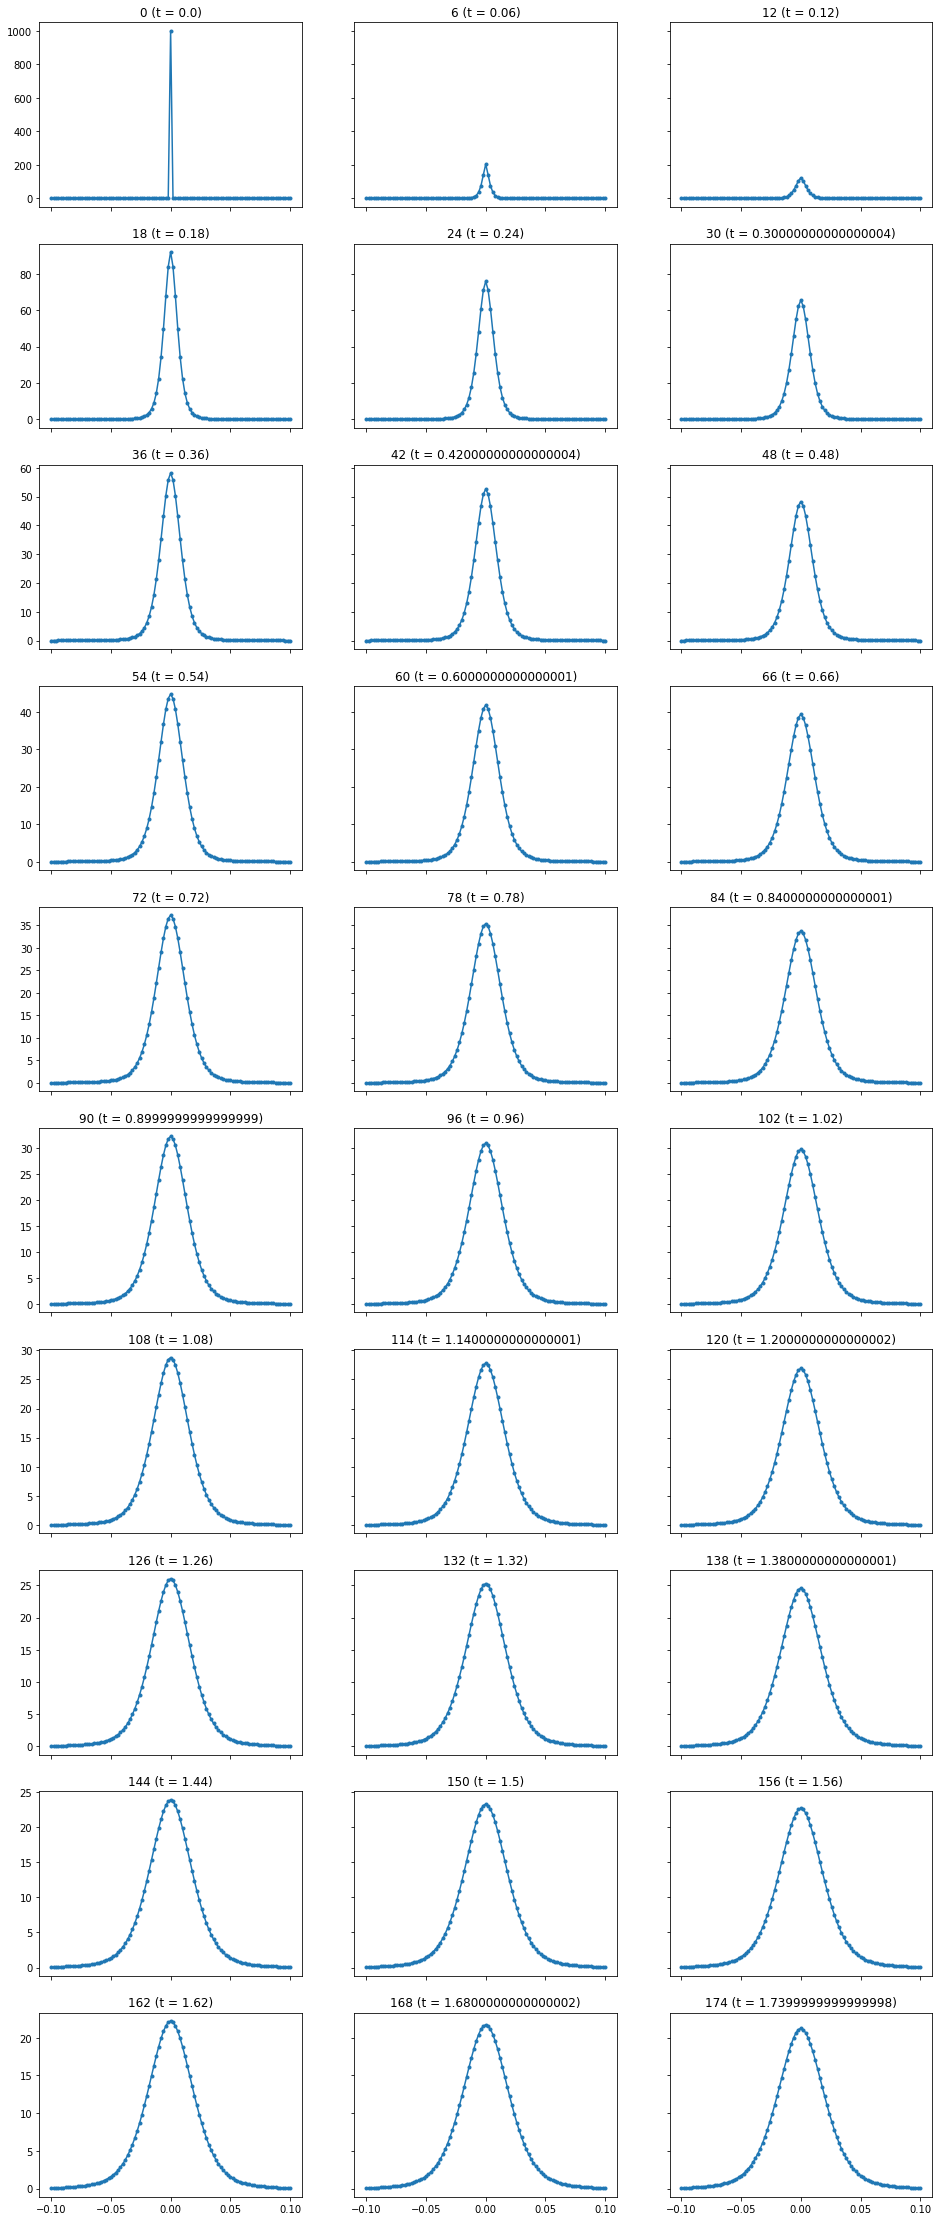

In [14]:
L, R = -0.1, 0.1
T = 2.0
alpha = 1.7
gamma = 0.9

def D(x, t):
    return 0.0005

h = 0.002
tau = 0.01
beta = 0.0

print((tau**gamma)/(h**alpha), gamma/alpha)

def psi(x):
    return 1000.0 * 1.0 if np.abs(x) < h else 0.0

def f(x, t):
    return 0.0

def decision(x, t):
    return np.exp(x) * np.exp(t)

a = MFDES(L, R, T, alpha, beta, gamma, D, h, tau, psi, f).solve()
a.draw(10, decision=None, sharex='all', sharey='row')

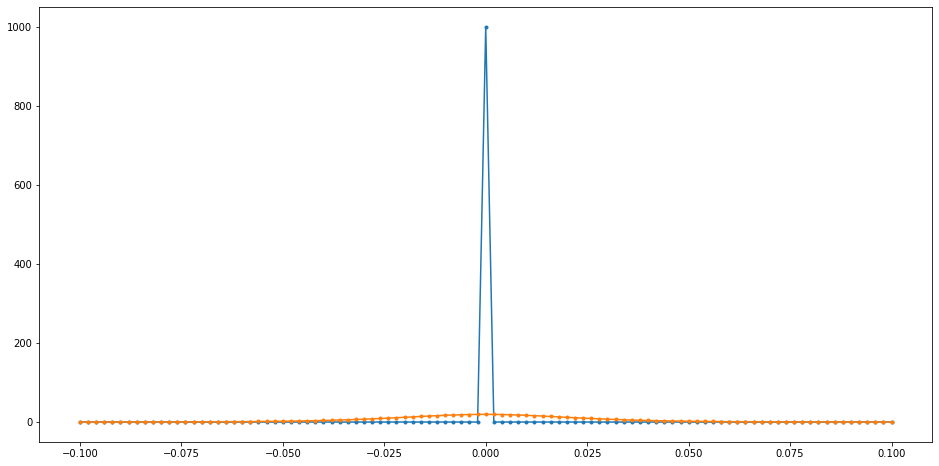

In [15]:
a.draw_first_last(decision=None, sharex='all', sharey='row')

19.999999999999996 0.4117647058823529
20 40


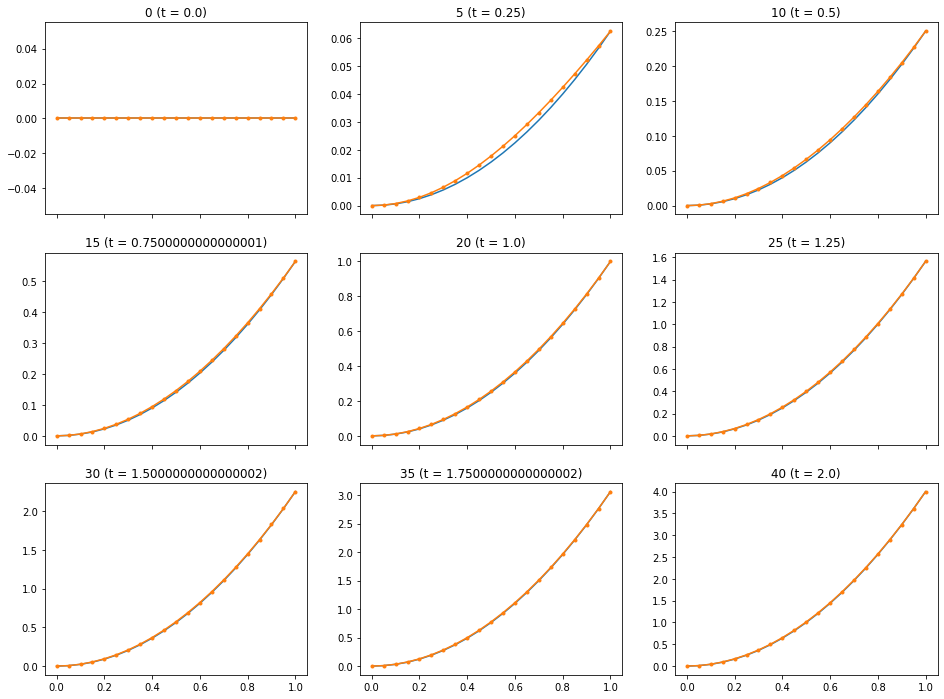

In [16]:
L, R = 0.0, 1.0
T = 2.0
alpha = 1.7
gamma = 0.7

def D(x, t):
    return GAMMA(3-alpha)/GAMMA(3) * (x**alpha)

h = 0.05
tau = 0.05
beta = 1.0

print((tau**gamma)/(h**alpha), gamma/alpha)

def psi(x):
    return 0.0

def f(x, t):
    return (GAMMA(3)/GAMMA(3-gamma) * (t**(2-gamma)) * (x**2)) - (t * x)**2

def phiL(t):
    return 0.0

def phiR(t):
    return t**2.0

def decision(x, t):
    return (t * x)**2

a = MFDES(L, R, T, alpha, beta, gamma, D, h, tau, psi, f, phiL, phiR).solve()
a.draw(3, decision=decision, sharex='all', sharey='none')

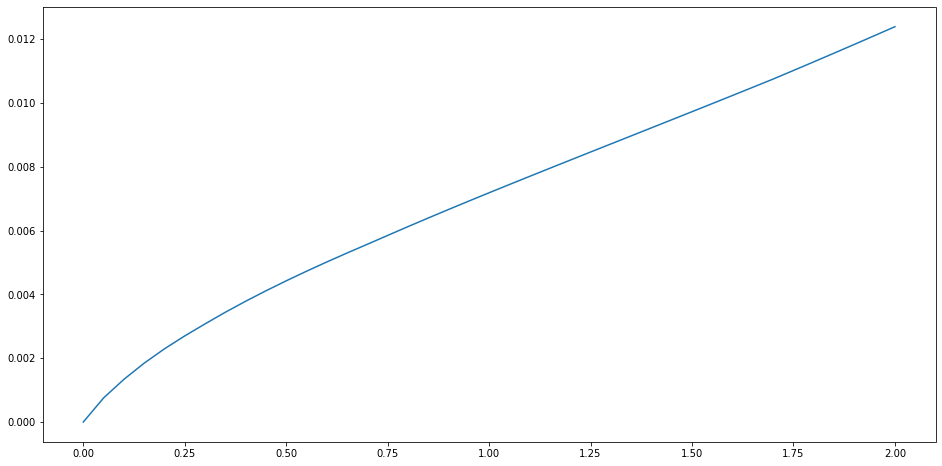

In [17]:
a.draw_error(decision=decision)